# Library Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# Downloading Dateset from Kaggle

In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()

# added api here

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                              63KB  2025-03-07 05:44:03           5508         78  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                               20KB  2025-02-18 06:50:24          12408        222  1.0              
atharvasoundankar/global-music-streaming-trends-and-listener-insights  Global Music Streaming Trends & Listener Insights    95KB  2025-03-09 05:12:00           1022         24  1.0              
salahuddinahmedshuvo/ecom

In [6]:
# downloading and unzipping
! kaggle datasets download -d tejashvi14/medical-insurance-premium-prediction
! unzip medical-insurance-premium-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction
License(s): CC0-1.0
  0% 0.00/7.08k [00:00<?, ?B/s]
100% 7.08k/7.08k [00:00<00:00, 9.62MB/s]
Archive:  medical-insurance-premium-prediction.zip
  inflating: Medicalpremium.csv      


In [7]:
!ls

kaggle.json  medical-insurance-premium-prediction.zip  Medicalpremium.csv  sample_data


# Extracting Dataset

In [8]:
df = pd.read_csv('Medicalpremium.csv')

df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


# Data Exploration

In [9]:
# checking type and count of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [10]:
# check for any missing values
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


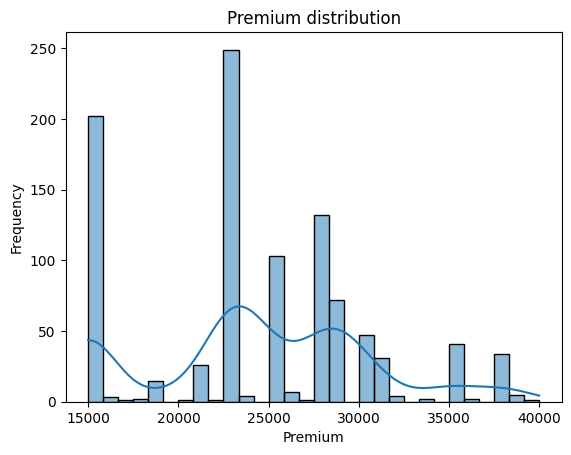

In [11]:
# distribution of premium price
sns.histplot(data=df, x='PremiumPrice', kde=True, bins=30)
plt.title("Premium distribution")
plt.xlabel("Premium")
plt.ylabel("Frequency")
plt.show()

more policies have lower premiums, forms a right-skewed distribution

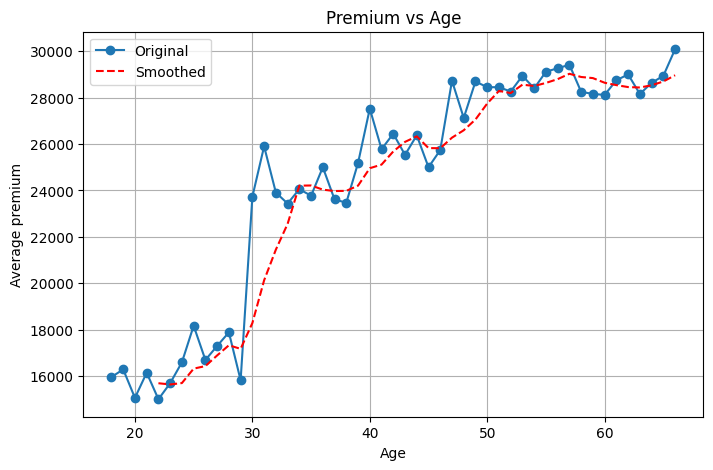

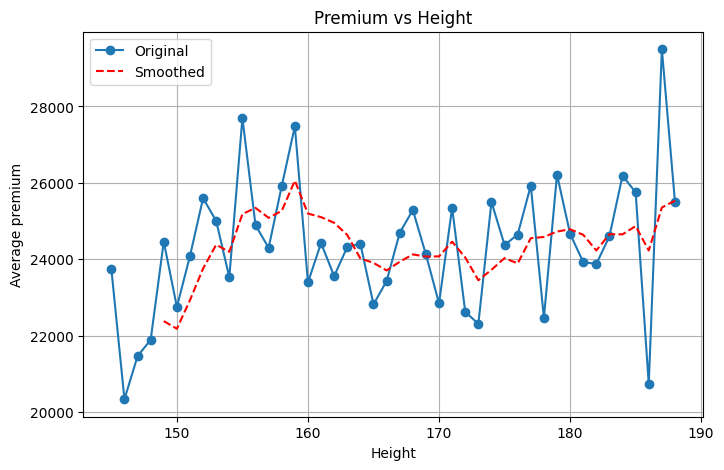

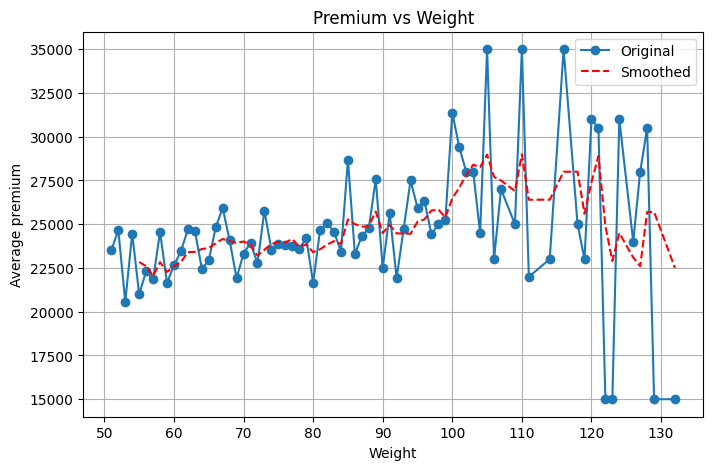

In [12]:
numerical_features = ['Age','Height','Weight']

for feature in numerical_features:
    # grp by numerical features, calc mean premium for each grp
    avg_premium_num = df.groupby(feature)['PremiumPrice'].mean().reset_index()

    # rolling mean for smoothing
    avg_premium_num['smoothed_price'] = avg_premium_num['PremiumPrice'].rolling(window=5).mean()

    plt.figure(figsize=(8, 5))
    plt.plot(avg_premium_num[feature], avg_premium_num['PremiumPrice'], marker='o', linestyle='-', label="Original")
    plt.plot(avg_premium_num[feature], avg_premium_num['smoothed_price'], marker='', linestyle='--', label="Smoothed", color='red')
    plt.title(f"Premium vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Average premium")
    plt.legend()
    plt.grid(True)
    plt.show()

shows significant increase in premium price as age increases, not much significance for height and weight

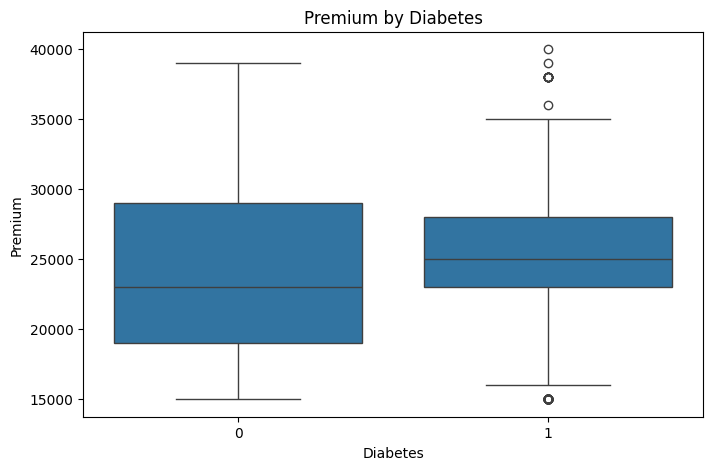

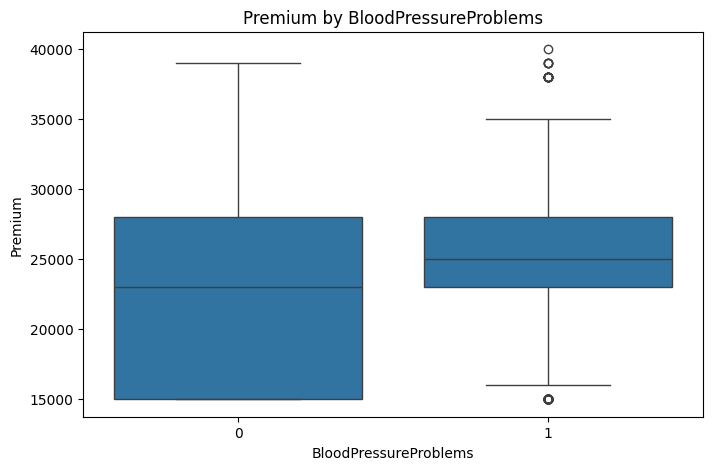

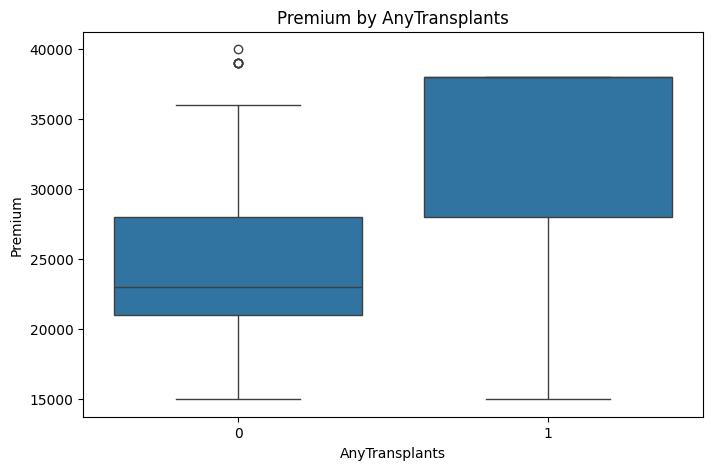

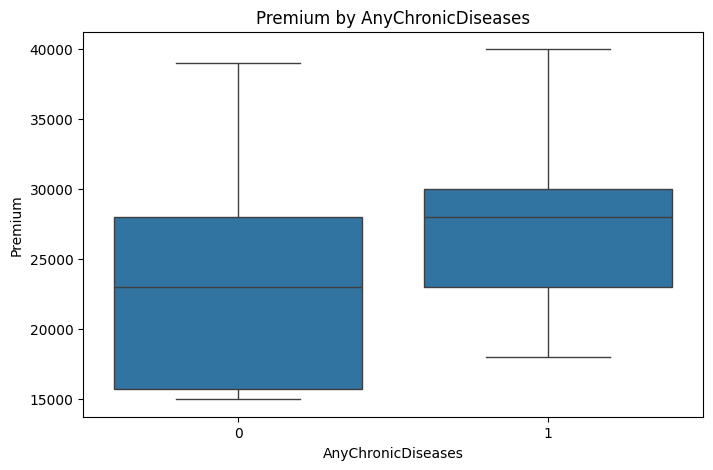

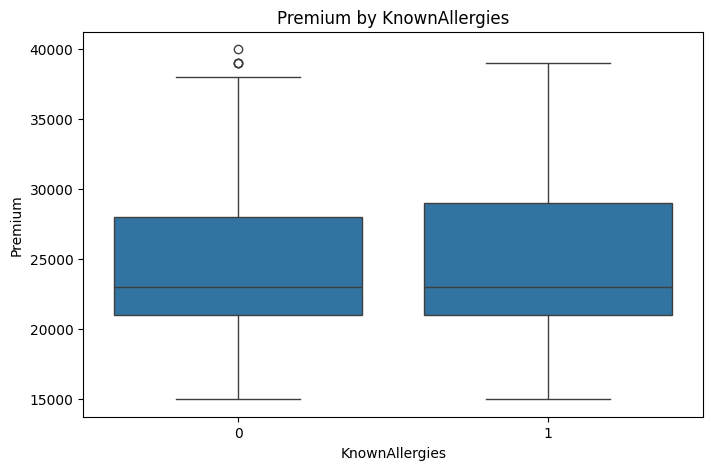

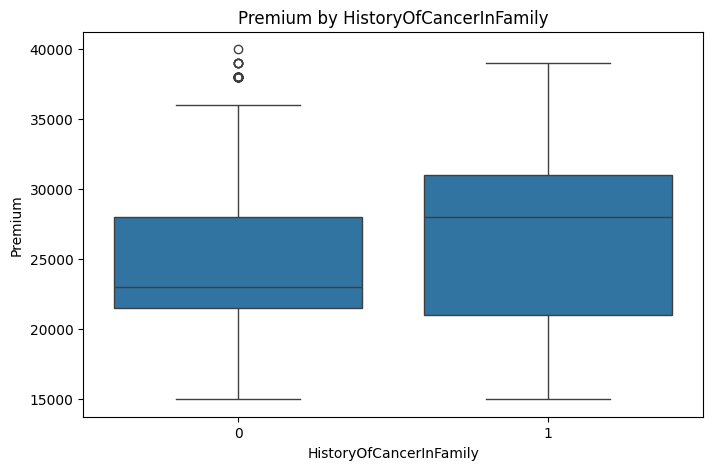

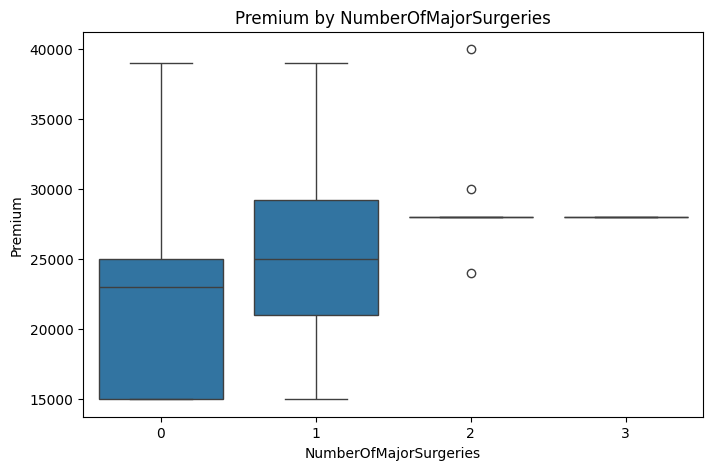

In [13]:
categorical_features = ['Diabetes','BloodPressureProblems','AnyTransplants',
                        'AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily',
                        'NumberOfMajorSurgeries']

# boxplots distri for cat features
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=feature, y='PremiumPrice')
    plt.title(f"Premium by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Premium")
    plt.show()

the presence of a yes for any of these features presents higher premium rates in general, especially for the presence of past transplants, where the boxplot is significantly higher for those who had compared to those who did not

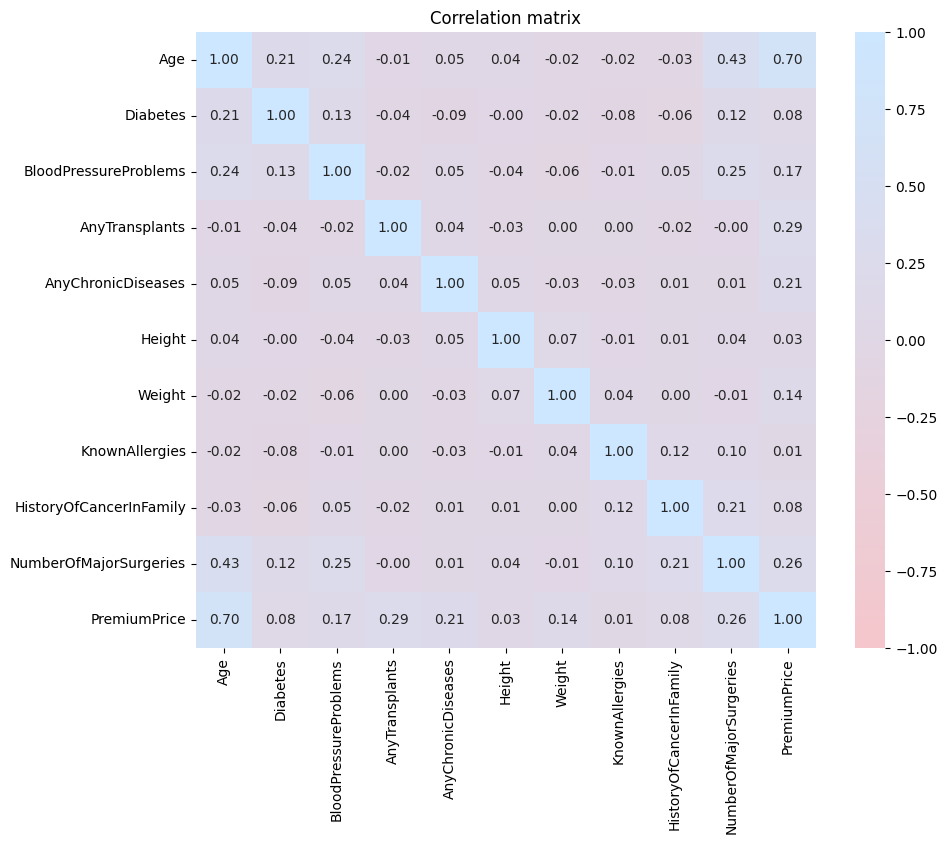

In [14]:
plt.figure(figsize=(10, 8))

pastels = LinearSegmentedColormap.from_list("pastel", ["#f5c6cb", "#cce7ff"])

# correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=pastels, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

no significant correlations between features, and a significant correlation between premium and age

# Model Training and Feature Selection

## Random Forest 1

In [15]:
# prep training and test sets
X = df.drop('PremiumPrice', axis=1)
y = df['PremiumPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# shape
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (788, 10)
Test set size: (198, 10)


In [16]:
# random forest regressor
model_rf_1 = RandomForestRegressor(random_state=42)

model_rf_1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# make predictions on the test set
y_pred1 = model_rf_1.predict(X_test)

mse_initial = mean_squared_error(y_test, y_pred1)
r2_initial = r2_score(y_test, y_pred1)

# evaluate the model mse and r2
print("MSE:", mse_initial)
print("R2 score:", r2_initial)

MSE: 5316742.424242424
R2 score: 0.8753190813557862


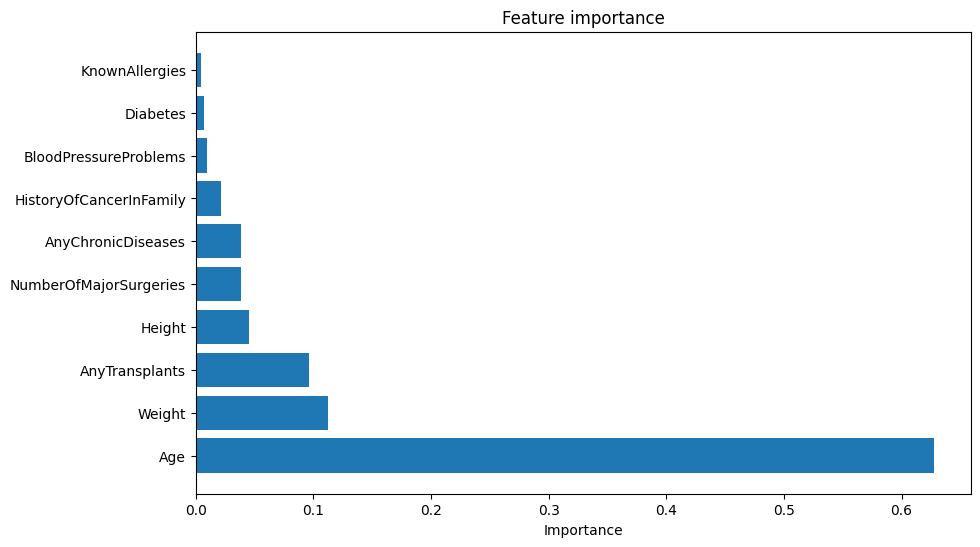

In [18]:
# feature importance
importances = model_rf_1.feature_importances_

# plot and sort features by importance
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature importance')
plt.barh(X.columns[indices], importances[indices])
plt.xlabel('Importance')
plt.show()

similar conclusion to before, age is the most significant factor that affects premiums

## RandomizedSearchCV 1

In [19]:
# randomizedsearch cv to get best hyperparameters
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator= model_rf_1,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# fit to model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c06cf0b9690>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c06cec4d1d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c06ca20b350>},
                   random_state=42, verbose=2)

## Random Forest 2

In [20]:
# using new parameters
model_rf_2 = RandomForestRegressor(
    max_depth=20,
    max_features='sqrt',
    min_samples_split=5,
    n_estimators=99,
    random_state=42
)

model_rf_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=5,
                      n_estimators=99, random_state=42)

In [21]:
# make predictions on the test set
y_pred2 = model_rf_2.predict(X_test)

# evaluate the model mse and r2
print("MSE:", mean_squared_error(y_test, y_pred2))
print("R2 score:", r2_score(y_test, y_pred2))

MSE: 6573050.696656991
R2 score: 0.8458578705228592


In [22]:
print("Training R2:", model_rf_2.score(X_train, y_train))
print("Test R2:", model_rf_2.score(X_test, y_test))

Training R2: 0.9116850450366948
Test R2: 0.8458578705228592


possible overfitting with lowered r2 for model_rf_2 and a higher training r2 compared to test r2, will require features to be relooked at

## Feature selection 1

In [23]:
# Case 1: remove 'KnownAllergies'
X_train_case1 = X_train.drop(columns=['KnownAllergies'])
X_test_case1 = X_test.drop(columns=['KnownAllergies'])

model_rf_case1 = RandomForestRegressor(random_state=42)
model_rf_case1.fit(X_train_case1, y_train)

y_pred_case1 = model_rf_case1.predict(X_test_case1)

print("Case 1: remove KnownAllergies")
print("MSE:", mean_squared_error(y_test, y_pred_case1))
print("R2:", r2_score(y_test, y_pred_case1))


# Case 2: remove 'Diabetes' & 'KnownAllergies'
X_train_case2 = X_train.drop(columns=['Diabetes', 'KnownAllergies'])
X_test_case2 = X_test.drop(columns=['Diabetes', 'KnownAllergies'])

model_rf_case2 = RandomForestRegressor(random_state=42)
model_rf_case2.fit(X_train_case2, y_train)

y_pred_case2 = model_rf_case2.predict(X_test_case2)

print("\nCase 2: remove Diabetes, KnownAllergies")
print("MSE:", mean_squared_error(y_test, y_pred_case2))
print("R2:", r2_score(y_test, y_pred_case2))


# Case 3: remove 'HistoryOfCancerInFamily', 'Diabetes' & 'KnownAllergies'
X_train_case3 = X_train.drop(columns=['HistoryOfCancerInFamily','Diabetes', 'KnownAllergies'])
X_test_case3 = X_test.drop(columns=['HistoryOfCancerInFamily','Diabetes', 'KnownAllergies'])

model_rf_case3 = RandomForestRegressor(random_state=42)
model_rf_case3.fit(X_train_case3, y_train)

y_pred_case3 = model_rf_case3.predict(X_test_case3)

print("\nCase 3: remove HistoryOfCancerInFamily, Diabetes, KnownAllergies")
print("MSE:", mean_squared_error(y_test, y_pred_case3))
print("R2:", r2_score(y_test, y_pred_case3))


Case 1: remove KnownAllergies
MSE: 4944703.03030303
R2: 0.8840436366768595

Case 2: remove Diabetes, KnownAllergies
MSE: 5229614.141414141
R2: 0.877362293811103

Case 3: remove HistoryOfCancerInFamily, Diabetes, KnownAllergies
MSE: 6138467.171717172
R2: 0.856049124639304


since Case 1 has the lowest mse and highest R2 score, will only remove 'KnownAllergies'

## RandomizedSearchCV 2 + Random Forest 3

In [24]:
# # Case 1: remove 'KnownAllergies'
# X_train_case1 = X_train.drop(columns=['KnownAllergies'])
# X_test_case1 = X_test.drop(columns=['KnownAllergies'])

# model_rf_case1 = RandomForestRegressor(random_state=42)
# model_rf_case1.fit(X_train_case1, y_train)

# y_pred_case1 = model_rf_case1.predict(X_test_case1)

# RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    estimator=model_rf_case1,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# rf with best parameters
random_search.fit(X_train_case1, y_train)

model_rf_3 = random_search.best_estimator_

y_pred_3 = model_rf_3.predict(X_test_case1)

print("MSE:", mean_squared_error(y_test, y_pred_3))
print("R2:", r2_score(y_test, y_pred_3))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
MSE: 4471059.097867194
R2: 0.8951508816577507


## Feature Selection 2

In [25]:
# X_train_case1 = X_train.drop(columns=['KnownAllergies'])
# X_test_case1 = X_test.drop(columns=['KnownAllergies'])

# add new feature bmi
X_train_case1['bmi'] = X_train_case1['Weight'] / ((X_train_case1['Height']/100) ** 2)
X_test_case1['bmi'] = X_test_case1['Weight'] / ((X_test_case1['Height']/100) ** 2)

## RandomizedSearchCV 3 + Random Forest 4

In [26]:
# RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    estimator=model_rf_3,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# rf with best parameters
random_search.fit(X_train_case1, y_train)

model_rf_4 = random_search.best_estimator_

y_pred_4 = model_rf_4.predict(X_test_case1)

mse_final = mean_squared_error(y_test, y_pred_4)
r2_final = r2_score(y_test, y_pred_4)

print("MSE:", mse_final)
print("R2:", r2_final)

print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
MSE: 4274883.17216606
R2: 0.8997513292026177
Best params: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 104}


# Performance Evaluations

### Model MSE & R2 Comparisons

In [27]:
# comparison
print("\nInitial vs optimized:")
print("\nInitial model:")
print("MSE:", mse_initial)
print("R2:", r2_initial)

print("\nFinal model:")
print("MSE:", mse_final)
print("R2:", r2_final)


Initial vs optimized:

Initial model:
MSE: 5316742.424242424
R2: 0.8753190813557862

Final model:
MSE: 4274883.17216606
R2: 0.8997513292026177


### Residual & Prediction Evaluation Models









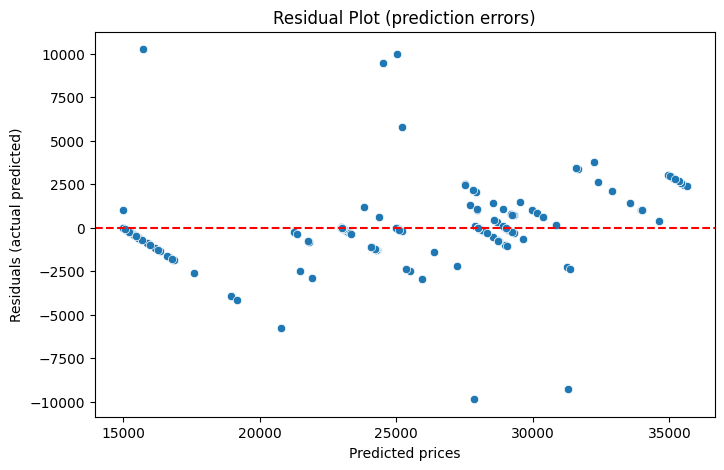

In [36]:
residuals = y_test - y_pred_4

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_4, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (prediction errors)")
plt.xlabel("Predicted prices")
plt.ylabel("Residuals (actual predicted)")
plt.show()

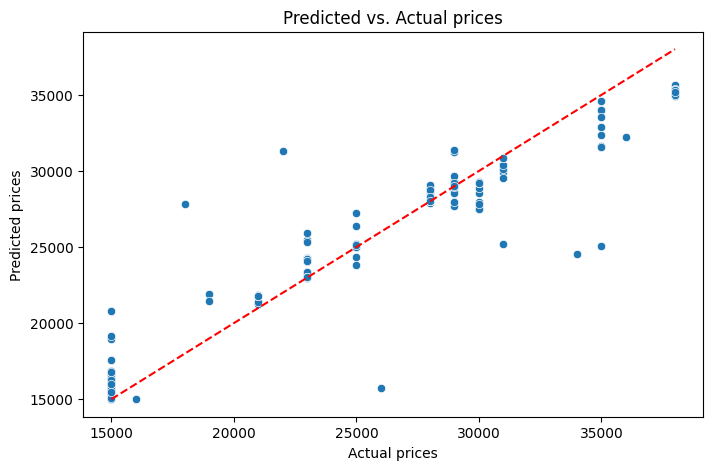

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predicted vs. Actual prices")
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()

Model has improved accuracy and no significant heteroscedasticity, hence good model fit

### Validation by examples

In [38]:
# final train
X_train_case1

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,HistoryOfCancerInFamily,NumberOfMajorSurgeries,bmi
762,19,0,0,0,0,146,55,0,0,25.802214
334,31,0,1,0,0,162,87,0,0,33.150434
890,58,1,0,0,0,147,75,0,0,34.707761
529,31,0,1,0,0,171,85,0,0,29.068773
468,26,1,1,0,0,167,70,1,1,25.099502
...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,155,58,0,0,24.141519
270,46,0,1,0,1,166,58,0,1,21.048048
860,61,1,0,0,0,161,66,0,3,25.461981
435,37,1,0,0,0,174,63,1,1,20.808561


In [39]:
# features used in model
feature_list = X_train_case1.columns.tolist()
print(feature_list)

['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'bmi']


#### Difference in age

Will expect an older individual to have a higher premium price from the analysis above

In [49]:
# younger
sample_test_example = {
    'Age': 18,
    'Diabetes': 0,
    'BloodPressureProblems': 0,
    'AnyTransplants': 0,
    'AnyChronicDiseases': 0,
    'Height': 175,
    'Weight': 70,
    'HistoryOfCancerInFamily': 0,
    'NumberOfMajorSurgeries': 0,
    'bmi': 22.85714
}


df_tester1 = pd.DataFrame([sample_test_example])
predicted1 = model_rf_4.predict(df_tester1)
prem1 = round(predicted1[0], 3)

print("Predicted premium for younger individual:", prem1)

Predicted premium for younger individual: 17573.867


In [50]:
# older
sample_test_example = {
    'Age': 50,
    'Diabetes': 0,
    'BloodPressureProblems': 0,
    'AnyTransplants': 0,
    'AnyChronicDiseases': 0,
    'Height': 175,
    'Weight': 70,
    'HistoryOfCancerInFamily': 0,
    'NumberOfMajorSurgeries': 0,
    'bmi': 22.85714
}

df_tester2 = pd.DataFrame([sample_test_example])
predicted2 = model_rf_4.predict(df_tester2)
prem2 = round(predicted2[0], 3)

print("Predicted premium for older individual:", prem2)

Predicted premium for older individual: 27786.421


expected premium differences true, model should be working accurately

# Conclusion

In overall the model was created using the process of:  
- Data Exploration and Cleaning
- Model Training using Random Forest
- Random Search Hyperparameter Tuning
- Feature Engineering
- Repeatition of model training to improve the model
- Evaluations and comparisons



